# Introduction to Artificial Neural Networks with Keras

Artificial Neural Networks (ANNs): is a Machine Learning model inspired by the networks of biological neurons found in our brains.

#### Biological Neuron
![Biological Neuron](images/biological-neuron.jpg)


Biological neurons produce short electrical impulses called *action potentials* (APs, or just *signals*) which travel along the axons and make the synapses release chemical signals called *neurotransmitters*. When a neuron receives suffient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses.

These individual neurons are organized in a vast network of billions, with each neuron typically connected to thousands of other neurons.

### Logical computations with Neurons

The below diagram represents the logical computations on neuron activation.

![Logical Computations](images/log_comp.png)

* If A is activated, then C also gets activated
* C is activated only when both A and B are activated (logical *AND*)
* C is activated if either A or B is activated (logical *OR*)
* C is activated only if A is active and B is off.

### The Perceptron
The *Perceptron* is one of the simplest ANN architectures based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes *lienar threshold unit* (LTU). the inputs and outputs are numbers (instead of binary on/off values, and each input connection is associated with a weight.

The TLU computes the weighted sum of its inputs ($z = w_1x_1 + w_2x_2 +  ... + w_nx_n = x^Tw$), then applies a step function to that sum and outputs the result : $h_w(x)$ = step(z), where z = $x^Tw$.


![TLU](images/tlu.png)


The most common step function used in Perceptrons is the *Heaviside step function.* Sometimes the sign function is used instead.

 $$ heaviside(z)=   \left\{
\begin{array}{ll}
      0 & if z < 0 \\
      1 & if z >= 0 \\
\end{array} 
\right.  $$

 $$ sgn(z)=   \left\{
\begin{array}{ll}
      -1 & if z < 0 \\
      1 & if z = 0 \\
      +1 & if z > 0 \\
\end{array} 
\right.  $$


A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all inputs.  
The inputs of the Perceptron are fed to special passthrough neurons called *input neurons*: they output whatever they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is generally added (x$_0$ = 1): called a *bias neuron*, which outputs 1 all the time.

![TLU](images/perceptron.png)


The above Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

Computing the outputs of a fully connected layer:

$$h_{W,b}(X) = \phi(XW + b)$$

where,<br>
X represents the matrix of input features,<br>
W is weight matrix,<br>
b is bias vector,<br>
$\phi$ is activation function (here, it is a *step function* as the artificial neurons are TLUs).

### How is a Perceptron trained?

The Perceptron training algorithm was largely inspired by *Hebb's Rule*.
It states that the connection between two neurons tends to increse when they fire simultaneously. This later became known as Hebb's rule (or **Hebbian learning**). 
Perceptrons are trained taking into account the error made by the network when it makes a prediction; the Perceptron learning rule reinforces connnections that help reduce the error.

Perceptron learning rule: $$ w_{i,j}^{(next step)} = w_{i,j} + \eta (y_j - \hat y_j) x_i $$

In this equation:
* $ w_{i,j}$ is the connection weight between the i$^{th}$ input neuron and the j$^{th}$ output neuron.
* x$_i$ is the i$^{th}$ input value of the current training instance.
* $y_j$ is the target output of the j$^{th}$ output neuron for the current training instance.
* $\hat y_j$ is the output of the  j$^{th}$ output neuron for the current training instance.
* $\eta$ is the learning rate.

## Setup

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

We will implement a single-TLU network with Scikit-Learn.

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int) # iris setosa

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

y_pred

array([0])

Perceptrons are incapable of solving some trivial problems (e.g., the XOR classification problem). This limitation can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a *Multilayer Perceptron* (MLP).

### Multilayer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called *hidden layers*, and one final layer of TLUs called the output layer. Every layer except for the output layer includes a bias neuron and is fully connected to the next layer.

![MLP](images/mlp.png)

When an ANN contains a deep stack of hidden layers, it is called a *deep neural network* (DNN).

#### Backpropagation  training algorithm
It can find out how each connection weight and each bias term should be tweaked in order to reduce the error.
* It handles one mini-batch at a time, and it goes through full training set multiple times. Each pass is called an *epoch*.
* Each mini-batch is passed to the network's input layer, which sends it to first hidden layer. The algorithm then computes the output of all neurons in this layer (for every instance in mini-batch). The result is passed on to next layer, and so on, until we get the output of the last layer. This is a *forward pass*.
* Next, the algorithm measures the network's output error.
* Then it computes how much each output connection contributed to the error (by applying *chain rule*).
* The algorithm then measures how much of these error contributions come from each connection in the layer below, working backward until the algorithm reaches the input layer.
* Finally, the algorithm performs Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

The step function is replaced with the logistic (sigmoid) function, $\sigma(z) = 1 / (1 + exp(-z)) $. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface).

Backpropagation also works well with other activation functions like:<br>
* The hyperbolic tangent function : tanh(z) = 2 $\sigma$(2z) - 1
* The Rectified Linear Unit function: ReLU(z) = max(0, z)

### Building an Image Classifier using the Sequential API

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
tf.__version__

'2.3.0'

In [14]:
keras.__version__

'2.4.0'

Let's start by loading the fashion MNIST dataset.

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [18]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Creating a validation set and scaling the pixel intensities to the 0-1 range by dividing with 255, we get:

In [30]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

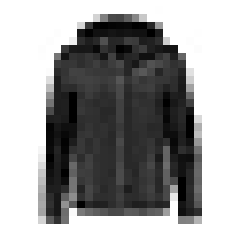

In [31]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [32]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [35]:
class_names[y_train[0]]

'Coat'

In [36]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

Saving figure fashion_mnist_plot


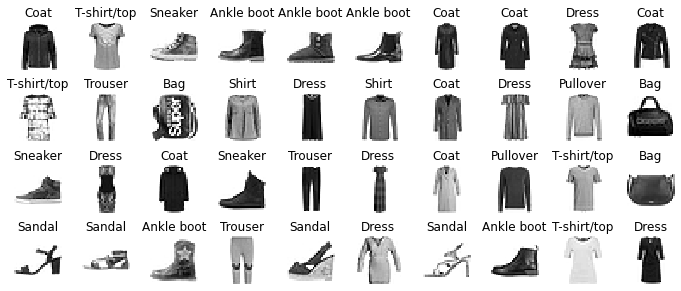

In [37]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

Now, let's build the neural network! Here is a classification with two hidden layers:

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
# displays all the model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In output shape: None means the batch size can be anything.<br>
The first hidden layer has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235500.

In [41]:
model.layers

In [42]:
model.get_layer('dense_1')

In [44]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [45]:
weights, biases = hidden1.get_weights()

In [49]:
weights, weights.shape

(array([[ 0.04718816,  0.00349372, -0.03895431, ..., -0.05589093,
          0.0453517 ,  0.00122051],
        [-0.00226308, -0.01142256, -0.05759096, ..., -0.05371315,
         -0.03826962, -0.05215397],
        [-0.05214519,  0.02888069,  0.02079277, ..., -0.06336838,
         -0.05147829, -0.05556271],
        ...,
        [ 0.02161963,  0.00059502,  0.00334571, ...,  0.03965842,
         -0.00016268,  0.00247915],
        [-0.02677171, -0.04137794, -0.03242487, ..., -0.01804408,
         -0.0023031 , -0.06939021],
        [ 0.02478953, -0.02344104, -0.03806646, ...,  0.05628519,
         -0.03580938, -0.07298822]], dtype=float32),
 (784, 300))

In [50]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [51]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7122 - accuracy: 0.7674 - val_loss: 0.4975 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4849 - accuracy: 0.8307 - val_loss: 0.4547 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4409 - accuracy: 0.8456 - val_loss: 0.4104 - val_accuracy: 0.8642
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4144 - accuracy: 0.8547 - val_loss: 0.3957 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3965 - accuracy: 0.8600 - val_loss: 0.3968 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.8668 - val_loss: 0.3662 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3665 - accuracy: 0.8710 - val_loss: 0.3686 - val_accuracy:

In [54]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [56]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [57]:
history.history

{'loss': [0.7122138738632202,
  0.4849025309085846,
  0.44087791442871094,
  0.414390504360199,
  0.3965364694595337,
  0.37925148010253906,
  0.36654454469680786,
  0.35504627227783203,
  0.344376802444458,
  0.33442261815071106,
  0.32511287927627563,
  0.31869274377822876,
  0.31148985028266907,
  0.30385059118270874,
  0.2976767122745514,
  0.29185163974761963,
  0.28566116094589233,
  0.2801434397697449,
  0.274552583694458,
  0.26957646012306213,
  0.2641980051994324,
  0.2600933313369751,
  0.25579044222831726,
  0.25068163871765137,
  0.24600456655025482,
  0.24239732325077057,
  0.23842334747314453,
  0.23391467332839966,
  0.23059283196926117,
  0.22653383016586304],
 'accuracy': [0.7674182057380676,
  0.8306545615196228,
  0.8456000089645386,
  0.8546545505523682,
  0.8599636554718018,
  0.8668000102043152,
  0.8710363507270813,
  0.8740727305412292,
  0.8769636154174805,
  0.8801090717315674,
  0.8845818042755127,
  0.8868545293807983,
  0.8888182044029236,
  0.891509115695

Saving figure keras_learning_curves_plot


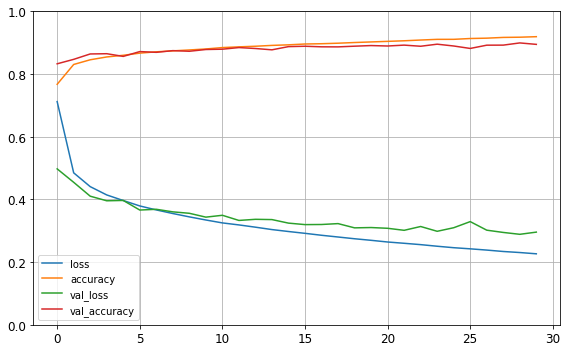

In [62]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()